In [1]:
# Install libraries (if not already installed)
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
# ✅ Step 1: Upload the CSV File
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank (1).csv


In [8]:
import pandas as pd
import io

# Get the uploaded filename automatically (works even if name is different)
filename = list(uploaded.keys())[0]

# Read the CSV with the correct separator
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
# ✅ Step 3: Check for nulls & basic info
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [10]:
# ✅ Step 4: Convert Target Column 'y' to Binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [11]:
# ✅ Step 5: One-Hot Encode Categorical Features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
X = df_encoded
y = df['y']


In [12]:
# ✅ Step 6: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# ✅ Step 7: Train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [14]:
# ✅ Step 8: Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8994475138121547
Confusion Matrix:
 [[772  35]
 [ 56  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       807
           1       0.55      0.43      0.48        98

    accuracy                           0.90       905
   macro avg       0.74      0.69      0.71       905
weighted avg       0.89      0.90      0.89       905



In [18]:
# ✅ Re-train a simpler tree for better clarity
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


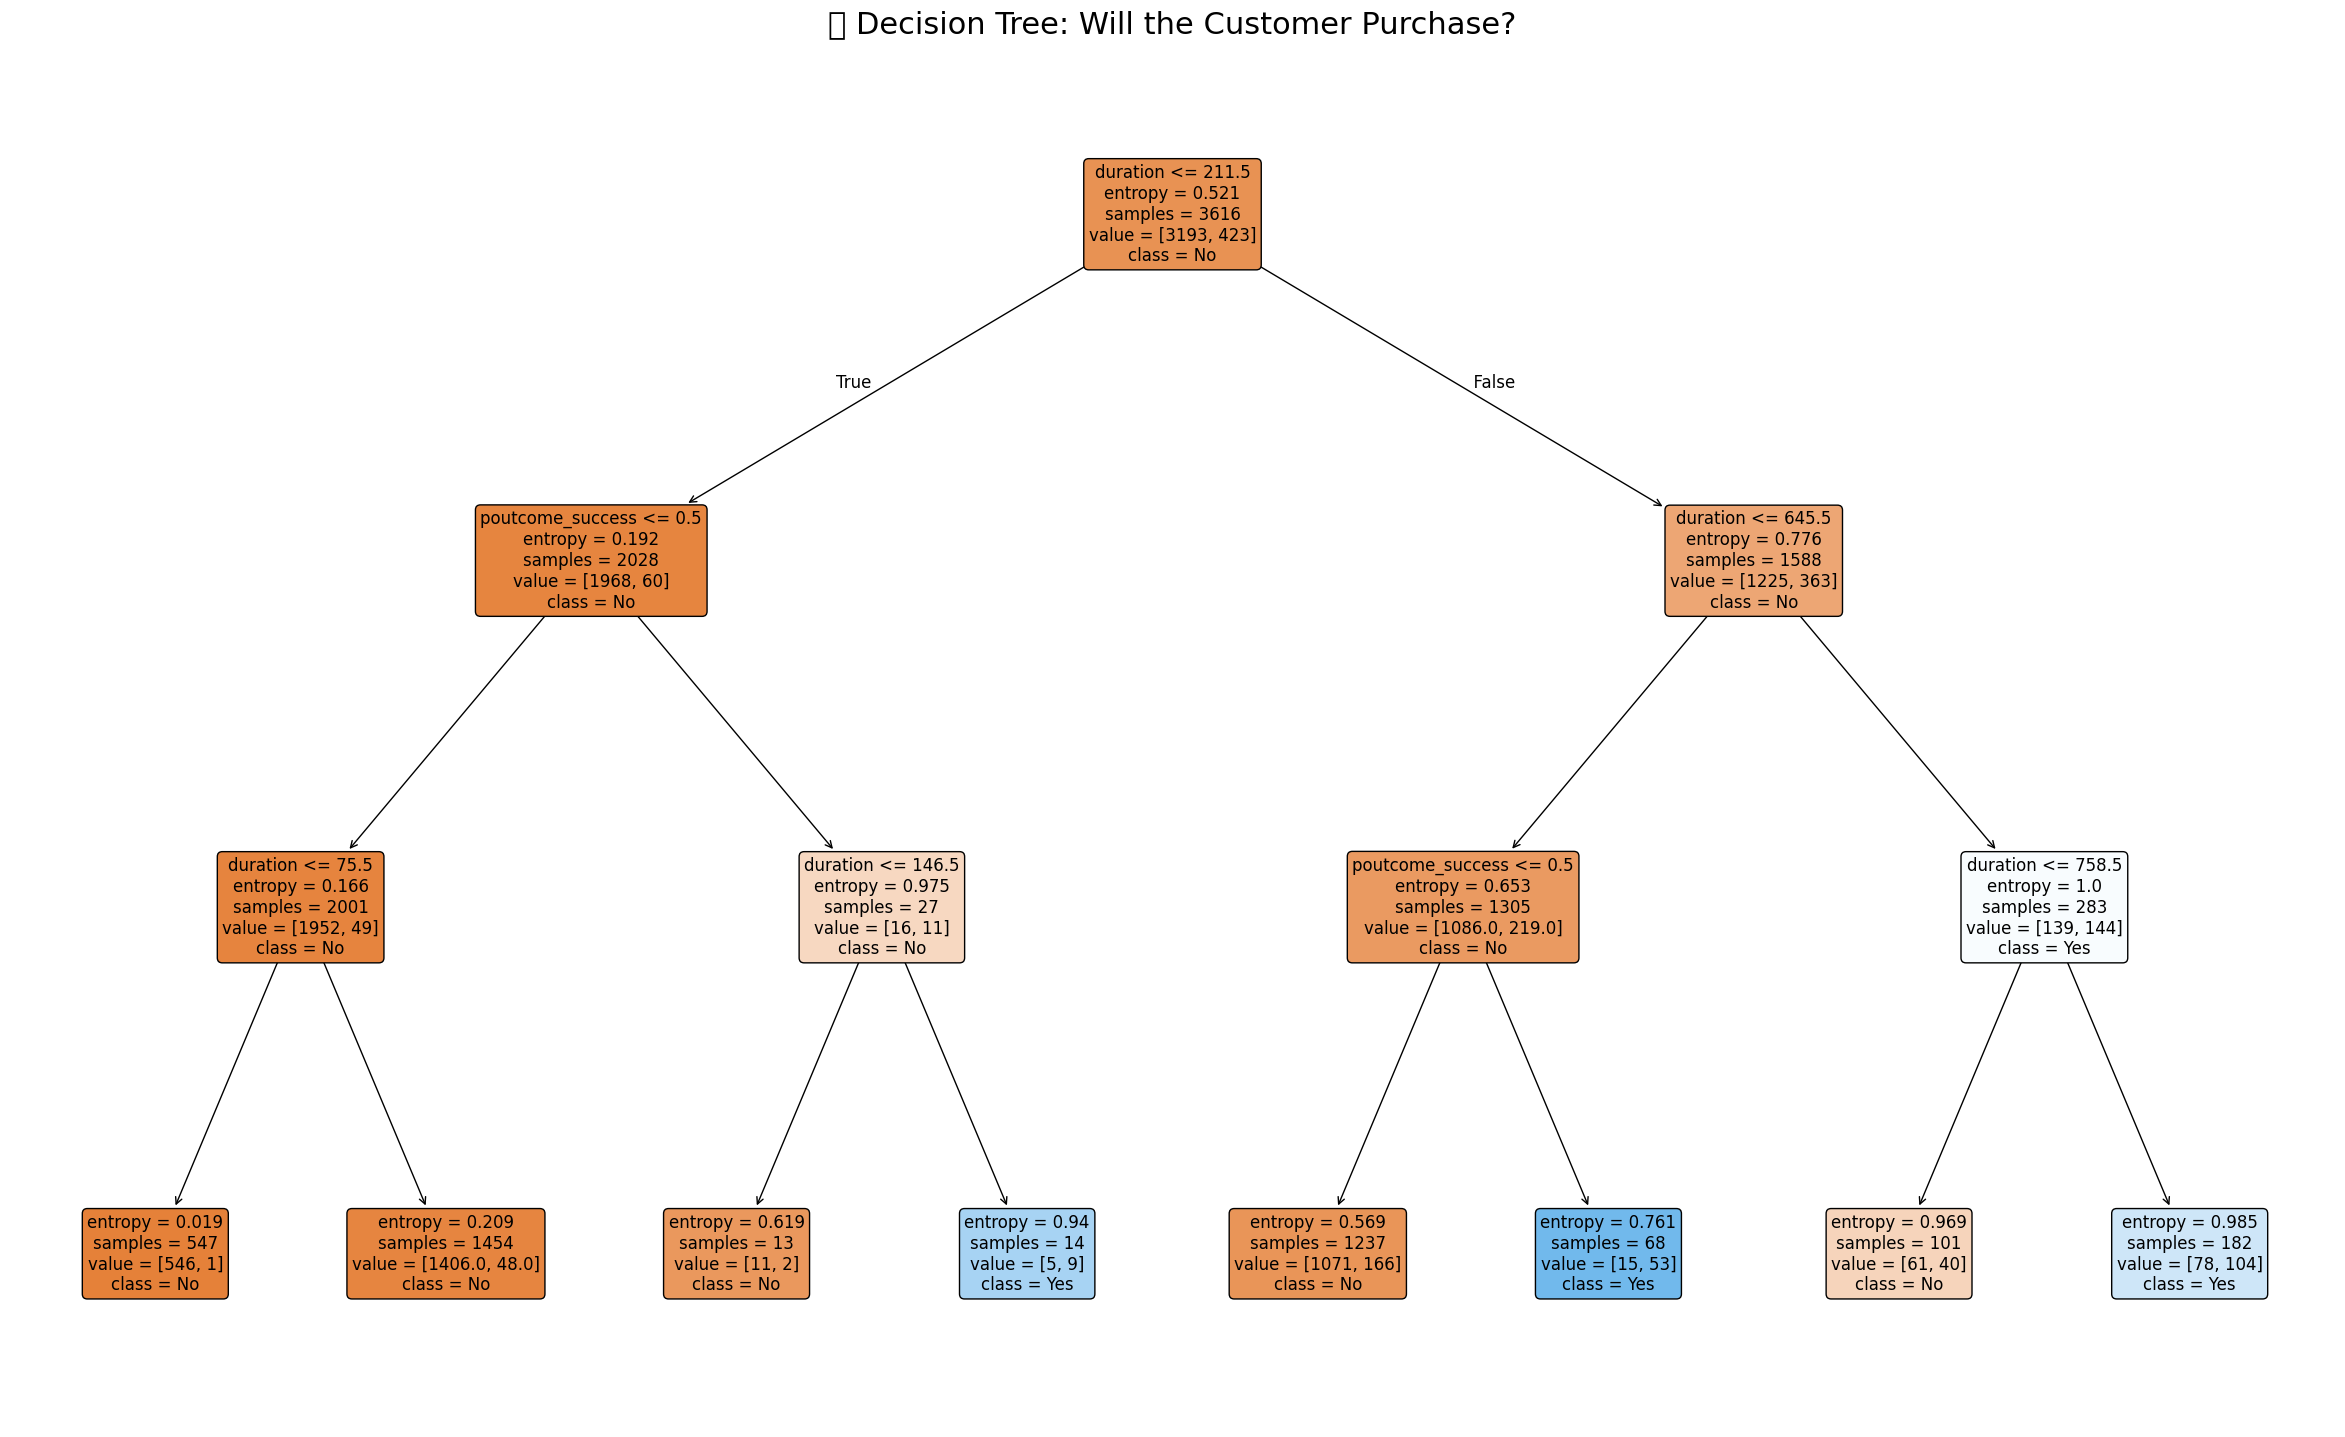

In [19]:
# ✅ Visualize the Decision Tree Clearly
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 18))  # Larger size = clearer view

plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("📊 Decision Tree: Will the Customer Purchase?", fontsize=22)
plt.show()


In [20]:
# ✅ Optional: Save it as image (for reports or sharing)
plt.savefig("Client_Friendly_Decision_Tree.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [23]:
print("📌 How to Read This Tree:")
print("""
🔹 Each box is a decision based on customer data.
🔹 Follow the path based on answers (True/False).
🔹 Final box shows prediction: 'Yes' = Will buy, 'No' = Won't buy.
🔹 'Samples' = How many customers reached that point.
🔹 'Entropy' = Purity of the decision.
🔹 Colored boxes make predictions easy to spot.
""")


📌 How to Read This Tree:

🔹 Each box is a decision based on customer data.
🔹 Follow the path based on answers (True/False).
🔹 Final box shows prediction: 'Yes' = Will buy, 'No' = Won't buy.
🔹 'Samples' = How many customers reached that point.
🔹 'Entropy' = Purity of the decision.
🔹 Colored boxes make predictions easy to spot.

